Epoch 1/30
361/361 - 18s - loss: 0.0386 - val_loss: 0.0023 - 18s/epoch - 49ms/step
Epoch 2/30
361/361 - 7s - loss: 0.0053 - val_loss: 0.0033 - 7s/epoch - 19ms/step
Epoch 3/30
361/361 - 6s - loss: 0.0042 - val_loss: 9.4995e-04 - 6s/epoch - 17ms/step
Epoch 4/30
361/361 - 6s - loss: 0.0036 - val_loss: 6.6135e-04 - 6s/epoch - 16ms/step
Epoch 5/30
361/361 - 6s - loss: 0.0034 - val_loss: 0.0012 - 6s/epoch - 17ms/step
Epoch 6/30
361/361 - 6s - loss: 0.0029 - val_loss: 4.1529e-04 - 6s/epoch - 16ms/step
Epoch 7/30
361/361 - 6s - loss: 0.0028 - val_loss: 4.7089e-04 - 6s/epoch - 17ms/step
Epoch 8/30
361/361 - 7s - loss: 0.0025 - val_loss: 6.1853e-04 - 7s/epoch - 19ms/step
Epoch 9/30
361/361 - 7s - loss: 0.0025 - val_loss: 9.9455e-04 - 7s/epoch - 19ms/step
Epoch 10/30
361/361 - 6s - loss: 0.0024 - val_loss: 3.7883e-04 - 6s/epoch - 16ms/step
Epoch 11/30
361/361 - 6s - loss: 0.0022 - val_loss: 4.8089e-04 - 6s/epoch - 16ms/step
Epoch 12/30
361/361 - 6s - loss: 0.0021 - val_loss: 0.0019 - 6s/epoch - 1

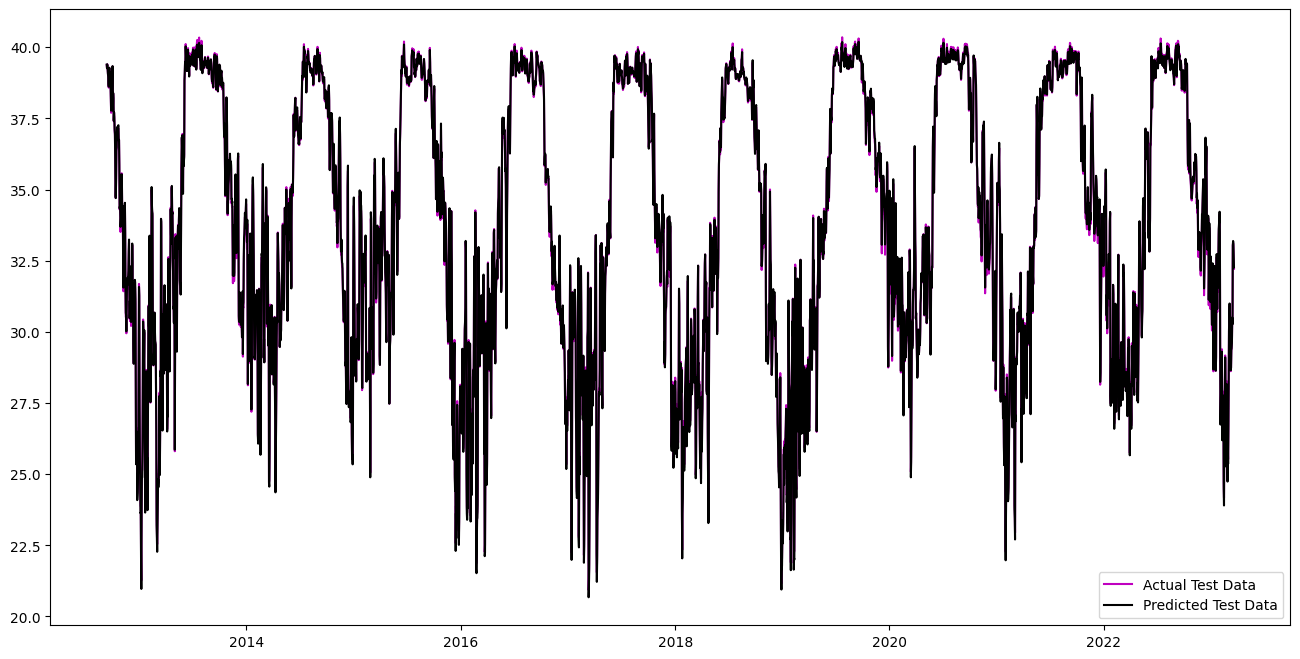

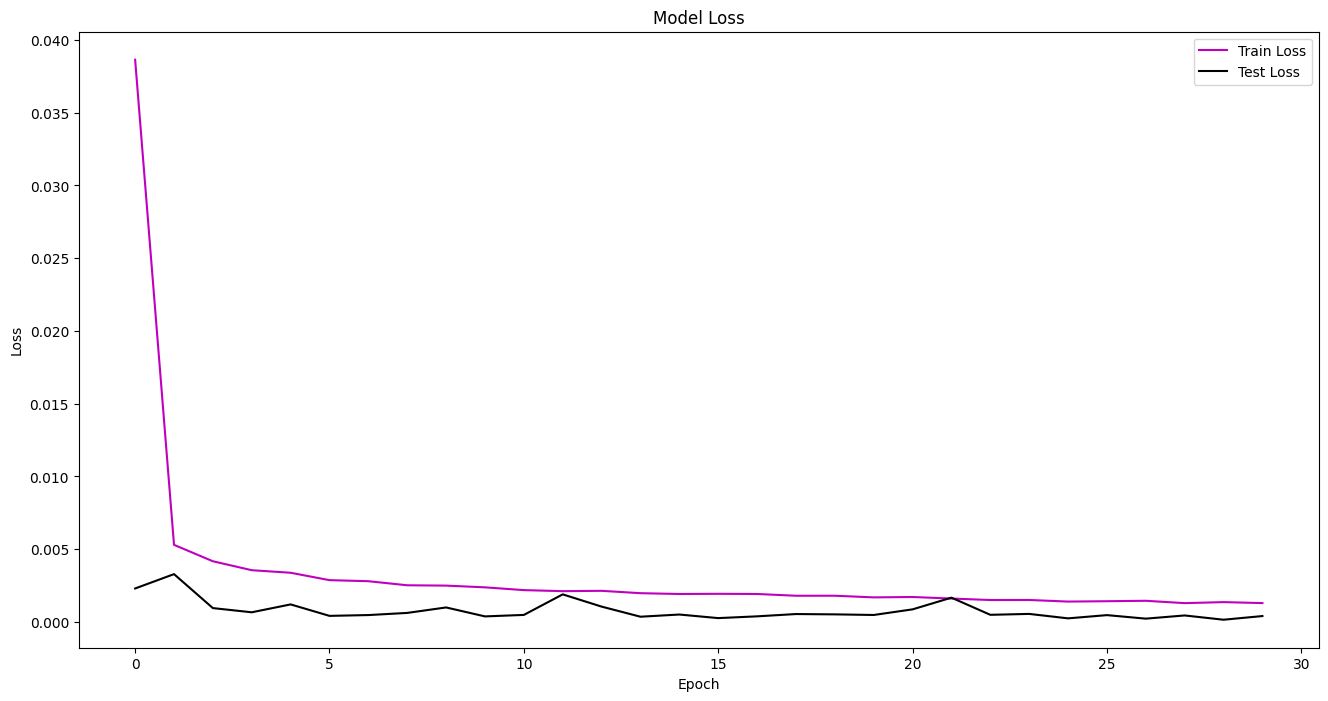

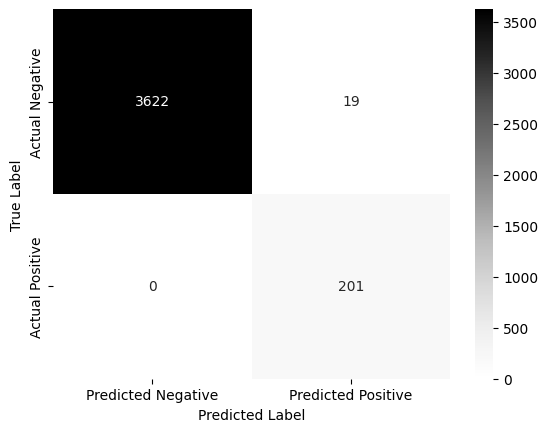

Occurred Heatwaves between 2012 & 2022 ->  201
Predicted Heatwaves between 2012 & 2022 ->  220
Heatwave Prediction accuracy: 99.51%


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from model import *
from data_utils import *
from visualization import *
from data_preprocessing import *
from heatwave_predict import *

# load and preprocess data
df = preprocess_data('../Dataset/Indore.csv')

# scale data
scaler, scaled = scale_data(df)

# split data into train and test sets
train, test = split_train_test(scaled)

# prepare data for LSTM model
n_steps_in = 7
n_steps_out = 1
trainX, trainY = prepare_data(train, n_steps_in, n_steps_out)
testX, testY = prepare_data(test, n_steps_in, n_steps_out)

# define and fit the LSTM model
model = build_model(trainX, n_steps_in, n_steps_out)
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=2)

# make predictions and evaluate the model
rmseScore, maeScore, predictTemp, realTemp = evaluate_model(model, scaler, testX, testY)
rmseScore_, maeScore_, predictTemp_, realTemp_ = evaluate_model(model, scaler, trainX, trainY)
print('Train Score: %.2f RMSE' % (rmseScore))
print('Test Score: %.2f MAE' % (maeScore))

# plot the predicted and actual temperatures
date = df.tail(realTemp.shape[0]).index
plot_train_test_predictions(realTemp, predictTemp, date)
plot_loss(history)

# predict the heatwave
occurredHeatwave, predictedHeatwave, accuracy = predict_heatwave(predictTemp, realTemp, realTemp_, df)
print("Occurred Heatwaves between 2012 & 2022 -> ", occurredHeatwave)
print("Predicted Heatwaves between 2012 & 2022 -> ", predictedHeatwave)
print(f"Heatwave Prediction accuracy: {accuracy*100:.2f}%")